In [49]:
import numpy as np


class LinearRegression(object):
    """Multivariate linear regression model using batch gradient descent"""

    def __init__(self):
        pass

    def train(self, x, y, epochs=10, batch_size=32, learning_rate=0.0001):

        self.theta_array = np.zeros(np.array(x.ndim)+1)

        x = self._add_bias(x)

        for _ in range(1, epochs):
            print(self.theta_array)
            avg_batch_partial_grads = np.average(
                                      (x.transpose().dot(self.theta_array) - y) * x, axis=1)
            self.theta_array -= learning_rate * avg_batch_partial_grads

    def validate(self, x, y):
        self._check_theta_exists()

        x = self._add_bias(x)

        predicted_y = np.dot(x.transpose(), self.theta_array)
        rmse = np.sqrt(np.average(np.square(y- predicted_y))) # Root Mean Square Error (RMSE)
        return predicted_y, rmse

    def predict(self, x):
        self._check_theta_exists()

        x = self._add_bias(x)

        predicted_y = np.dot(x.transpose(), self.theta_array)
        return predicted_y

    def _add_bias(self, x):
        if x.ndim == 1:
             x = np.row_stack((x, np.ones(len(x))))
        else:
             x = np.row_stack((x, np.ones(len(x[0]))))
        return x
    
    def _avg_batch_loss(x, theta, y):
        avg_batch_loss = np.average(
                 np.sqrt(
                 np.square(
                 np.dot(x[index], theta) - y)))
        return avg_batch_loss
    
    def _check_theta_exists(self):
        assert hasattr(self, 'theta_array'), ("ValueError: theta is not defined. "
            "Please make sure to train the model before predicting.")


In [50]:
linear_regression = LinearRegression()

In [51]:
x = np.array(np.arange(100))
delta = np.random.uniform(-10,10, size=(100,))
y = (.4 * x +3 + delta)

In [52]:
linear_regression.train(x, y, epochs=10, learning_rate=0.0001)

[0. 0.]
[0.14792478 0.00235355]
[0.2472668  0.00397464]
[0.31398185 0.00510382]
[0.35878543 0.00590265]
[0.38887379 0.00647962]
[0.40907979 0.0069076 ]
[0.42264902 0.00723551]
[0.43176118 0.00749622]


In [53]:
y_predicted = linear_regression.predict(x)

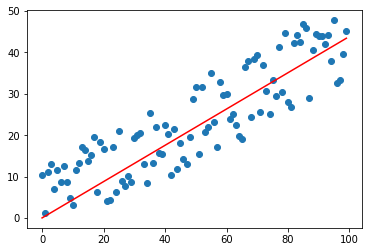

In [54]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.scatter(x, y)
plt.plot(x, y_predicted, color='red')
plt.show()